<a href="https://colab.research.google.com/github/NilanjanChattopadhyay/NilanjanChattopadhyay.github.io/blob/master/notebooks/Deep-Learning-from-Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to the Basics of Neural Networks**

Goal of this tutorial:

*   Introduce Neural Networks
*   Introduce Pytorch
*   Build a neural network from scratch

Prerequisites:

*   Comfortable with Python
*   Familiarity with *Pytorch Tensor* or *Numpy Array* operations
*   Basic understanding of Linear and Logistic Regression




## **Neural Networks**

A Neural Network is a computer algorithm inspired by biological brain that can 'learn' from data. Neural nets are composed of artificial neurons organised into layers. An individual neuron can be connected to several neurons in the previous layer or to the layer above it. 

A neuron receives one or more inputs, adds them up and passes the sum through a non-linear function to produce an output. Each input is usually separately multipled with a weight.



### **Neuron**

<img src="https://github.com/NilanjanChattopadhyay/NilanjanChattopadhyay.github.io/blob/master/images/NeuralNet-1.png?raw=true" width="557" height="400" alt="Neural Network with 1 Neuron" title="Neural Network" align="center"/>

<br>  Let's look at the above diagram - Neural Network with 1 neuron. This network receives 3 inputs from the Input Layer. Each input is then multiplied with a weight, $w_{i}$,  before going into the next layer. The weights are represented by arrows and are also called parameters. This network has only 1 Layer with 1 Unit. This unit adds up the 3 weighted inputs it received. Then it passes the sum through a non-linear function, $f$, and outputs a number. The output is represented by $y$ in this diagram. 

This network can be mathematically represented as:
$$ y = f(w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3}) $$

The general form the this equation will become:
$$ y = f\biggl(\sum_{i=1}^{n}w_{i}x_{i}\biggr) $$

### **Activation Function**

The non-linear function $f$ is called the activation function. The most commonly used activation functions are the rectified linear unit (ReLU), the sigmoid function and the hyperbolic tangent function.

> **Rectified Linear Unit**
$$ ReLU(x) = max(0, x) $$

> **Sigmoid Function**
$$ \sigma(x) = \frac{1}{1 + e^{-x}}$$

> **Hyperbolic Tangent Function**
$$ tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

These three fucntions are the most popular activations used in Neural Networks, but any function can be used as an activation function. There are some desirable properties we generally want in an activation -

*   Non-Linear functions
*   Differentiable functions

We will explore the benefits of these properties later.



### **Neural Network with multiple neurons**

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg" width="296" height="356" title="Neural Network" align="center"/>

In practice we will almost always use neural networks with more than 1 unit. The above image is an example of a neural net with a 1 hidden layer. Each hidden unit receives 3 inputs modified by a weight. The weights are different for each unit and thus, there are 12 weights/parameters/arrows between the input layer and hidden layer. Each hidden unit sums the weighted inputs and passes the sum through an activation function to produce an output. The output of the hidden layer becomes input for the next layer.

## **Pytorch**

Pytorch is an open source machine learning framework developed by Facebook's AI Research Lab. It is one of the most popular deep learning library along with Google's Tensorflow.

Two core features of this library are:
* N-dimensional Tensor computing (similar to Numpy Arrays). Computations performed using Pytorch Tensors can be accelerated by using GPUs
* Automatic differentiation

### **Why can't we use Numpy for deep learning?**

NumPy is the fundamental package for scientific computing with Python and provides a powerful N-dimensional array object. But operations like matrix multiplication performed using Pytorch Tensors can utilize GPUs and can be 50x faster than Numpy Arrays. Since matrix multiplication is fundamental to neural networks, using Pytorch we can create bigger networks and use bigger datasets. Another reason for using Pytorch is that it provides advanced functionalities like automatic differentiation (autograd) for operations on Tensors. Implementing neural networks involves differentiation which can get extremely complicated as the size of the network grows. Differentiation of parameters/weights of neural networks can be automated using Pytorch.



# **A Neural Net from Scratch using Pytorch**

We will first create a neural network using nothing but PyTorch Tensors.

A PyTorch Tensor is conceptually identical to an n-dimensional Numpy array. When $n=1$, the array is called a vector. For $n=2$, the 2D array is a matrix. What would be a matrix of matrices? A 3-dimensional tensor. 

Let's start by importing libraries.

In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

In [0]:
torch.manual_seed(42)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Let's create a input data to experiment on. We will create a vector with 10,000 data points using pytorch's rand function.

***torch.rand*** - returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)



In [0]:
Input = torch.rand(10000, 1)
Input

tensor([[0.8823],
        [0.9150],
        [0.3829],
        ...,
        [0.2181],
        [0.9120],
        [0.4111]])

In [0]:
Input.shape

torch.Size([10000, 1])

Let the *Input* vector created above be $x_1$. A neural net with single neuron for this input data will be:

$$ y = f(w_{1}x_{1}) $$

There is one additonal parameter we usually consider in a neuron - **bias**. Bias is added to the weighted sum of the inputs before going into the activation function. The modified equation will become -

$$ y = f(w_{1}x_{1} + b) $$

Let's pick up random weight and bias for our *Input* data.


In [0]:
W1 = 2*torch.rand(1, 1)-1
B1 = 2*torch.rand(1)-1
W1, B1

(tensor([[0.5414]]), tensor([-0.8311]))

Let's consider the case where our activation function is ***Identity Function***, i.e. $f(x)=x$. Then our model becomes:
$$ y = w_{1}x_{1} + b $$

This is identitical to linear regression.

Let's create the *Output* vector by mutiplying every data point with weight *W1* and adding bias *B1*.

In [0]:
Output = torch.empty(10000, 1)

def model():
  for i in range(10000):
    Output[i] = Input[i]*W1 + B1

  return Output.view(10000, 1)

In [0]:
%time model()

CPU times: user 168 ms, sys: 960 µs, total: 169 ms
Wall time: 171 ms


tensor([[-0.3534],
        [-0.3357],
        [-0.6238],
        ...,
        [-0.7130],
        [-0.3373],
        [-0.6085]])

But this is very inefficient way of generating output vector. We can speed up the process exponentially if we use matrix multiplication.

*Input* data can be considered as matrix with 10000 rows and 1 column. The weight *w1* is also a 1x1 matrix.

Matrix multiplication of $Input_{(10000,1)}*W1_{(1,1)}$ will result in a matrix with 10,000 rows and 1 column. We will utilise the broadcasting abilities of Pytorch to add bias $B1$ to this. 

We can use $@$ operator from Pytorch for matrix multiplication.

In [0]:
%time Input@W1 + B1

CPU times: user 472 µs, sys: 0 ns, total: 472 µs
Wall time: 584 µs


tensor([[-0.3534],
        [-0.3357],
        [-0.6238],
        ...,
        [-0.7130],
        [-0.3373],
        [-0.6085]])

We can see that matrix multiplication is magnitudes faster compared to the *for loop*. Though the *for loop* is pretty fast, but to use bigger networks for bigger data sets with millions of dimensions, the time difference between *for loop* and *matrix multiplication* will be significant.

Let's look at why we need non-linear activations for neural networks. Matrix multiplications are linear transformations and no matter how many neurons we add or how much we increase the number of hidden layers, the output will always be a linear transformation of the input. Without any non-linearity neural networks, no matter how wide or deep, cannot learn non-linear relationships between Input and Output. In practice, the relationship will almost always be non-linear.

Through activation functions we can introduce non-linearity. Neural Networks with atleast 1 hidden layer and non-linear activation function like ReLU are **universal approximators**. According to **Universal Approximation Theorem** these neural networks can approximate any continuous function.

Let's try to see that in practice for regression problems. We will create a neural network for a random input with 1 hidden layer and 100 hidden units.

In [0]:
Input = 2*torch.rand(10000, 1) - 1
Input

tensor([[-0.6009],
        [-0.5854],
        [ 0.5283],
        ...,
        [ 0.7124],
        [ 0.3041],
        [-0.7577]])

We have an *Input* vector with 10,000 elements randomly picked from $U[-1, 1)$. We define *W1* of the size $[1, 100]$. The 100 represents the number of hidden units and 1 represents the dimension of input elements. Every hidden unit will have its own bias. Thus, bias *B1* is a vector of size $100$.

In [0]:
W1 = 2*torch.rand(1, 100)-1
B1 = 2*torch.rand(100)-1

In [0]:
X1 = Input@W1 + B1

In [0]:
X1.shape

torch.Size([10000, 100])

Each element of the input was mutiplied with a weight and bias was added to it independently for all the hidden units. Thus, 100 outputs from every element. Hence, the size of *X1* is $[10000, 100]$. We didn't use any activation function.

Let's define the weights of the output layer. Now every element has 100 dimensions and we need 1 output for each element for our regression. So, our net will have 1 unit in the output layer. Therefore, the weight matrix for the output layer will be of the size $[100, 1]$. Since there is 1 unit, bias *B2* is a vector of size 1.

In [0]:
W2 = 2*torch.randn(100, 1)-1
B2 = 2*torch.randn(1)-1

In [0]:
Output = X1@W2 + B2
Output.shape

torch.Size([10000, 1])

We can plot the *Input* and *Output* vectors and, as expected, in absence of any non-linear activation function we observe a perfect linear relationship between them.

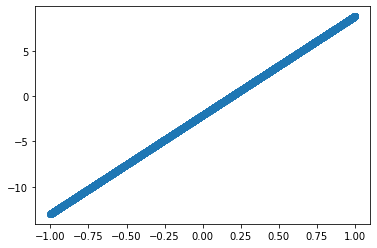

In [0]:
plt.scatter(Input.numpy(), Output.squeeze().numpy())

Will we get a linear relationship between Input and Output if a non-linear activation fuction is used? Or would our output be similar to the shape of the activation function?

Let's implement ReLU as an activation function for the same input and same parameters(weights and biases are also called parameters).

The formula for ReLU is:
$$ ReLU(x) = max(0, x) $$

This means if the output of the hidden layer is $-ve$, it will be replaced by $0$. *X1* contains the output of the hidden layers. It has 10,000 rows each for every element from *Input* and 100 columns where each column contains the output of a hidden unit.

In [0]:
X1

tensor([[ 0.9557, -0.2965,  0.2151,  ..., -0.5407,  0.9081, -0.3212],
        [ 0.9472, -0.3104,  0.2025,  ..., -0.5394,  0.9031, -0.3203],
        [ 0.3358, -1.3050, -0.6986,  ..., -0.4457,  0.5417, -0.2584],
        ...,
        [ 0.2347, -1.4695, -0.8477,  ..., -0.4302,  0.4820, -0.2482],
        [ 0.4588, -1.1048, -0.5172,  ..., -0.4645,  0.6145, -0.2709],
        [ 1.0418, -0.1565,  0.3420,  ..., -0.5539,  0.9590, -0.3299]])

Pytorch has a built-in function for ReLU. Please check Pytorch's documentation for more details.

In [0]:
X1.clamp(0)

tensor([[0.9557, 0.0000, 0.2151,  ..., 0.0000, 0.9081, 0.0000],
        [0.9472, 0.0000, 0.2025,  ..., 0.0000, 0.9031, 0.0000],
        [0.3358, 0.0000, 0.0000,  ..., 0.0000, 0.5417, 0.0000],
        ...,
        [0.2347, 0.0000, 0.0000,  ..., 0.0000, 0.4820, 0.0000],
        [0.4588, 0.0000, 0.0000,  ..., 0.0000, 0.6145, 0.0000],
        [1.0418, 0.0000, 0.3420,  ..., 0.0000, 0.9590, 0.0000]])

***.clamp*** has replaced all the $-ve$ elements of the tensor with $0$. Let's calculate the *Output* again using the same *Input* and weights with ReLU activation.

In [0]:
X1 = Input@W1 + B1
X1.clamp_(0)
Output = X1@W2 + B2

We can plot the *Output* against *Input* and see that the relation is non-linear. Also, note that the shape is not similar to the shape of the activation function.

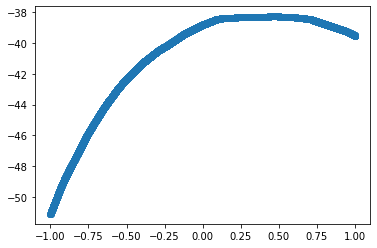

In [0]:
plt.scatter(Input.numpy(), Output.squeeze().numpy())

Up untill now, we were only looking at the shapes of random predictions. Let's see if the neural network can approximate the relationship between *Input* and *Output*.

We will create an *Input* vector with 10,000 elements randomly picked from $U[-1, 1)$. We will create a *Target* vector from the input using the following relation:

$$ Target = f(Input) = Input^{2}$$

Let's also plot the graph to visually confirm that the relation is non-linear.

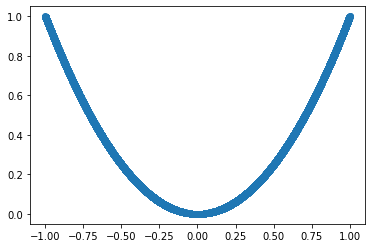

In [0]:
Input = 2*torch.rand(10000, 1)-1
Target = Input.pow(2)

plt.scatter(Input.numpy(), Target.numpy())

The goal is to see how well a simple neural network can learn and approximate this non-linear relationship.

We will create a neural network with 1 Hidden Layer and 100 Hidden Units. Let's randomly intialize the weights and parameters. Notice that we set ***requires_grad*** as True. We will come back to this later.

In [0]:
W1 = torch.empty(1, 100).uniform_(-1, 1).requires_grad_(True)
B1 = torch.empty(100).uniform_(-1, 1).requires_grad_(True)

W2 = torch.empty(100, 1).uniform_(-1, 1).requires_grad_(True)
B2 = torch.empty(1).uniform_(-1, 1).requires_grad_(True)

We can get the predictions of the model following the same steps we used previously. This step is known as the **Forward Pass**. 

But how good are those predictions? Similar to *Linear Regression*, we can use ***Mean Squared Error*** to see how close or far our predictions are from the actual *Target*.

We can also plot the predictions against the input vector to see its shape.

In [0]:
X1 = Input@W1 + B1
X2 = X1.clamp(0)
Predicted = X2@W2 + B2

Loss = (Target - Predicted).pow(2).mean()
Loss

tensor(2.9038, grad_fn=<MeanBackward0>)

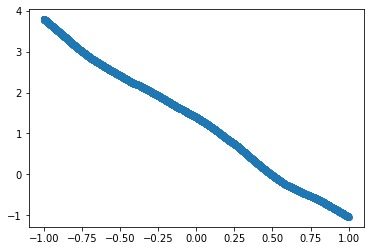

In [0]:
plt.scatter(Input.numpy(), Predicted.detach().numpy())

With random parameters(weights and biases), as visible in the graph, the predictions are very different from actual targets.

## **Training Neural Networks**

Till now we have seen how to define a neural network with 1 hidden layer. The parameters are initialized at random. Thus, the ouput of our neural network is also random. The next step is to *train* the network and to make it learn the relationship between *input* and *target*.

For the model to learn, it first needs to evaluate the how good or bad its performance is. For regression problems, *Mean Squared Error* is most commonly used as the *Loss Fuction* to evaluate the performance of the model. Many other functions can be used as a *Loss Function*.

$$ MSE(Target, Prediction) = \frac{1}{n_{rows}} \sum_{i=1}^{n_{rows}} (Target_{i}-Prediction_{i})^{2}$$


With random parameters, the loss will be pretty bad at the beginning. The goal of the training process is to optimize the loss function. Since our loss function is MSE, we want to minimize it as much as possible. 

The MSE is a function of *Target* and *Predictions*. Predictions are a function of *Input* and *parameters* (weights and biases). So, we can change/update the parameters (weights and biases) of the network to reduce loss.

$$ Loss = f(Input, Target, parameters)$$

To minimize our loss, we will use an algorithm called *Gradient Descent*. Gradient Descent is an iterative algorithm, that starts with random parameters on a loss function and travels down its slope in steps until it reaches the lowest point of the function. With each step we update the parameters reducing loss.

The slope of a function is its gradients. The step size is $gradient$ * $learning$ $rate$. We update the parameters by going down the slope:

$$ new\_parameters = old\_prameters - learning\_rate*gradient$$









### Calculating Gradients

We don't need to worry about the mathematics that goes into gradient calculation. Calulating gradients in a neural network can be a daunting task. Fortunately, Pytorch can automatically calculate gradients of the parameters.

If you wish to explore the mathematics of gradient calculation for neural networks, you can find details [here](https://explained.ai/matrix-calculus/index.html).

Setting **requires_grad=True** indicates that we want Pytorch to automatically compute gradients of the Tensors.

```
W1 = torch.empty(1, 100).uniform_(-1, 1).requires_grad_(True)
B1 = torch.empty(100).uniform_(-1, 1).requires_grad_(True)

W2 = torch.empty(100, 1).uniform_(-1, 1).requires_grad_(True)
B2 = torch.empty(1).uniform_(-1, 1).requires_grad_(True)
```
W1.grad, B1.grad, W2.grad, B2.grad will be the Tensors holding the gradients.

We will use **Loss.backward()** to compute the gradient of loss with respect to all Tensors with requires_grad=True.

In [0]:
learning_rate = 0.001

# Compute gradient of the loss functions
Loss.backward()

# Pytorch will, by default, will calculate the gradients by considering every Tensor operation with requires_grad=True
# But we don't want the weight update step to be used for gradient calculation
# We do this be wrapping the update part in torch.no_grad()
with torch.no_grad():
  
  W1 -= learning_rate * W1.grad
  B1 -= learning_rate * B1.grad
  
  W2 -= learning_rate * W2.grad
  B2 -= learning_rate * B2.grad
  
  # Set the gradients to zero
  # loss.backward() adds the gradients to whatever is already stored
  W1.grad.zero_()
  B1.grad.zero_()
  
  W2.grad.zero_()
  B2.grad.zero_()

Let's calculate the loss again to see if the model is better or worse than before.

In [0]:
X1 = Input@W1 + B1
X2 = X1.clamp(0)
Predicted = X2@W2 + B2
Loss = (Target - Predicted).pow(2).mean()
Loss

tensor(2.7102, grad_fn=<MeanBackward0>)

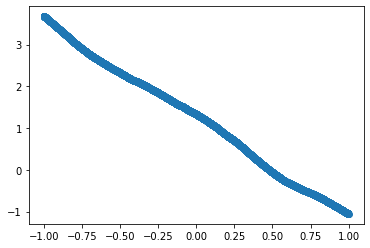

In [0]:
plt.scatter(Input.numpy(), Predicted.detach().numpy())

Though the loss decreased, we can see from the plot that the predictions are still pretty bad. 

We can keep on updating the weights till the loss stops decreasing. Let's put all the code together and repeat the process of updating parameters 1,000 times (1,000 epochs).

In [0]:
# Input and Target
Input = 2*torch.rand(10000, 1)-1
Target = Input.pow(2)

# Random Weight Initialization
W1 = torch.empty(1, 100).uniform_(-1, 1).requires_grad_(True)
B1 = torch.empty(100).uniform_(-1, 1).requires_grad_(True)

W2 = torch.empty(100, 1).uniform_(-1, 1).requires_grad_(True)
B2 = torch.empty(1).uniform_(-1, 1).requires_grad_(True)

learning_rate = 0.001

for i in range(1000):
  
  # Forward Pass - Computing Predictions
  X1 = Input@W1 + B1
  X2 = X1.clamp(0)
  Predicted = X2@W2 + B2
  
  # Compute and Print Loss
  Loss = (Target - Predicted).pow(2).mean()
  if i%100 == 0:
    print('MSE for epoch {} is {}'.format(i, Loss))
    
  # Backward Pass - Updating Parameters
  Loss.backward()
  with torch.no_grad():
    
    W1 -= learning_rate * W1.grad
    B1 -= learning_rate * B1.grad
    
    W2 -= learning_rate * W2.grad
    B2 -= learning_rate * B2.grad
    
    W1.grad.zero_()
    B1.grad.zero_()

    W2.grad.zero_()
    B2.grad.zero_()

print('MSE for epoch {} is {}'.format(i, Loss))

MSE for epoch 0 is 1.3800901174545288
MSE for epoch 100 is 0.22866958379745483
MSE for epoch 200 is 0.1459691822528839
MSE for epoch 300 is 0.09707656502723694
MSE for epoch 400 is 0.06567448377609253
MSE for epoch 500 is 0.0454106368124485
MSE for epoch 600 is 0.03228699788451195
MSE for epoch 700 is 0.02371649444103241
MSE for epoch 800 is 0.018053771927952766
MSE for epoch 900 is 0.014254206791520119
MSE for epoch 999 is 0.011682878248393536


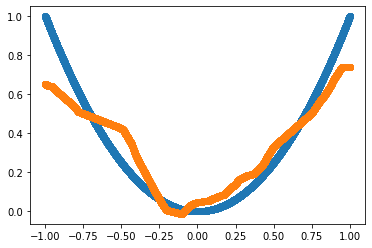

In [0]:
plt.scatter(Input.numpy(), Target.numpy())
plt.scatter(Input.numpy(), Predicted.detach().numpy())

The loss keeps on decreasing with every loop (*epoch*). From the plot, we see that the predictions are starting to take the shape of the output.

**Congratulations!** We have defined and trained a neural network from scratch.

But what if we apply gradient descent to a neural network without non-linear activations? Let's confirm how important the activation function was. We run the same code without the activation part on the same input data.

In [0]:
# Random Weight Initialization
# Why didn't we use the old weights?
W1 = torch.empty(1, 100).uniform_(-1, 1).requires_grad_(True)
B1 = torch.empty(100).uniform_(-1, 1).requires_grad_(True)

W2 = torch.empty(100, 1).uniform_(-1, 1).requires_grad_(True)
B2 = torch.empty(1).uniform_(-1, 1).requires_grad_(True)

learning_rate = 0.001

for i in range(1000):
  
  # Forward Pass - Computing Predictions
  X1 = Input@W1 + B1
  # No Non-Linear Activation Function
  X2 = X1
  Predicted = X2@W2 + B2
  
  # Compute and Print Loss
  Loss = (Target - Predicted).pow(2).mean()
  if i%100 == 0:
    print('MSE for epoch {} is {}'.format(i, Loss))
  
  # Backward Pass - Updating Parameters
  Loss.backward()
  with torch.no_grad():
    
    W1 -= learning_rate * W1.grad
    B1 -= learning_rate * B1.grad
    
    W2 -= learning_rate * W2.grad
    B2 -= learning_rate * B2.grad
    
    W1.grad.zero_()
    B1.grad.zero_()

    W2.grad.zero_()
    B2.grad.zero_()

print('MSE for epoch {} is {}'.format(i, Loss))

MSE for epoch 0 is 1.5926787853240967
MSE for epoch 100 is 0.08801382035017014
MSE for epoch 200 is 0.08771540224552155
MSE for epoch 300 is 0.08771520107984543
MSE for epoch 400 is 0.08771520107984543
MSE for epoch 500 is 0.08771520107984543
MSE for epoch 600 is 0.08771520107984543
MSE for epoch 700 is 0.08771519362926483
MSE for epoch 800 is 0.08771519362926483
MSE for epoch 900 is 0.08771519362926483
MSE for epoch 999 is 0.08771519362926483


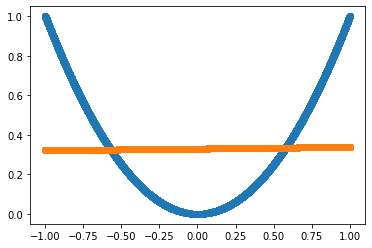

In [0]:
plt.scatter(Input.numpy(), Target.numpy())
plt.scatter(Input.numpy(), Predicted.detach().numpy())

This shows that no matter how many layers are used, without non-linear activations, neural nets cannot learn non-linear relationships.

# **Pytorch Functionalities**

Let's start taking advantage of PyTorch’s built-in functionalities and modules.

## **torch.nn Module**

Even with automatic differentiation, designing and training a large neural networks will be very messy if we start from the scratch. In PyTorch, the nn classes provides high-level abstractions that can be used to avoid this problem. We will use it to shorten our code and make it more understandable.

Using **torch.nn** we won't need to:

*   Manually define and initialize parameters
*   Write loss functions from scratch
*   Manually update every model parameter
*   Manually zero out the gradient of every model parameter

In [0]:
# torch.nn.Sequential is used to define Neural Networls as a sequence of layers
# Linear Module computes output from input using matrix multiplication
# It automatically sets requires_grad = True
# torch.nn.Linear requires 3 arguments - size of each input sample, size of each output sample, and if want an additive bias
Model = torch.nn.Sequential(torch.nn.Linear(1, 100, bias=True), torch.nn.ReLU(), torch.nn.Linear(100, 1, bias=True))

# torch.nn has lots of commonly used loss functions like Mean Squared Error (MSE)
Loss_Function = torch.nn.MSELoss()

learning_rate = 0.001

for i in range(1000):

  # Forward Pass 
  Predicted = Model(Input)

  # Compute and Print Loss  
  Loss = Loss_Function(Target, Predicted)
  if i%100 == 0:
    print('MSE for epoch {} is {}'.format(i, Loss))

  # Backward Pass
  Loss.backward()
  with torch.no_grad():
    # loop through model.parameters() to automatically update the values for each parameter
    for parameters in Model.parameters():
      parameters -= learning_rate * parameters.grad
    # model.zero_grad(): zero out the gradients for every parameter 
    Model.zero_grad()

print('MSE for epoch {} is {}'.format(i, Loss))

MSE for epoch 0 is 0.09116117656230927
MSE for epoch 100 is 0.07772304862737656
MSE for epoch 200 is 0.07228375226259232
MSE for epoch 300 is 0.06723042577505112
MSE for epoch 400 is 0.06253289431333542
MSE for epoch 500 is 0.05816524475812912
MSE for epoch 600 is 0.054103784263134
MSE for epoch 700 is 0.05032665655016899
MSE for epoch 800 is 0.046813737601041794
MSE for epoch 900 is 0.04354659467935562
MSE for epoch 999 is 0.040537431836128235


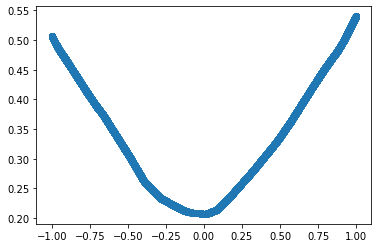

In [0]:
plt.scatter(Input.numpy(), Predicted.detach().numpy())

But we are losing some flexibility with torch.nn.Sequential. We might need to build models that are more complex than a sequence of linear layers (we will learn about them in later posts). But we also don't want to manually define every part of the model. By subclassing nn.Module and defining a forward we can have the flexibility of creating complex architectures with all the functionalities of torch.nn.Sequential.

In [0]:
# Define Model
class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.Layer1 = torch.nn.Sequential(torch.nn.Linear(1, 100, bias=True), torch.nn.ReLU(), torch.nn.Linear(100, 1, bias=True))

  def forward(self, Input):
    Prediction = self.Layer1(Input)
    return Prediction

# Instantiate Model
Model = Net()

# Loss Function
Loss_Function = torch.nn.MSELoss()

learning_rate = 0.001

for i in range(1000):
  
  # Forward Pass 
  Predicted = Model(Input)

  # Compute and Print Loss  
  Loss = Loss_Function(Target, Predicted)
  if i%100 == 0:
    print('MSE for epoch {} is {}'.format(i, Loss))

  # Backward Pass
  Loss.backward()
  with torch.no_grad():
    for parameters in Model.parameters():
      parameters -= learning_rate * parameters.grad 
    Model.zero_grad()

print('MSE for epoch {} is {}'.format(i, Loss))

MSE for epoch 0 is 0.5430305004119873
MSE for epoch 100 is 0.0666835829615593
MSE for epoch 200 is 0.05978963151574135
MSE for epoch 300 is 0.05438756197690964
MSE for epoch 400 is 0.049601368606090546
MSE for epoch 500 is 0.04527349770069122
MSE for epoch 600 is 0.04134185612201691
MSE for epoch 700 is 0.03776630014181137
MSE for epoch 800 is 0.034514039754867554
MSE for epoch 900 is 0.031555745750665665
MSE for epoch 999 is 0.028890695422887802


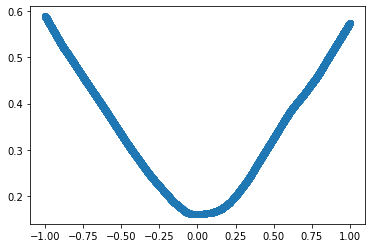

In [0]:
plt.scatter(Input.numpy(), Predicted.detach().numpy())

## **torch.optim Module**

Till now were manually implementing Gradient Descent for updating the parameters and reduce loss. Pytorch has a built-in package to do it for us - ***torch.optim***. 

Also, ***torch.optim** contains more advanced and faster optimization algorithms, like Adam, that can be hard to implement manually.

In [0]:
# Define Model
class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.Layer1 = torch.nn.Sequential(torch.nn.Linear(1, 100, bias=True), torch.nn.ReLU(), torch.nn.Linear(100, 1, bias=True))

  def forward(self, Input):
    Prediction = self.Layer1(Input)
    return Prediction

# Instantiate Model
Model = Net()

# Loss Function
Loss_Function = torch.nn.MSELoss()

learning_rate = 0.001

# Define an Optimizer that will update the model parameters
# Pass the model parameters as an argument
Optimizer = torch.optim.SGD(Model.parameters(), lr=learning_rate)

for i in range(1000):
  
  # Forward Pass 
  Predicted = Model(Input)

  # Compute and Print Loss  
  Loss = Loss_Function(Target, Predicted)
  if i%100 == 0:
    print('MSE for epoch {} is {}'.format(i, Loss))

  # Backward Pass
  Loss.backward()
  Optimizer.step()
  Optimizer.zero_grad()

print('MSE for epoch {} is {}'.format(i, Loss))

MSE for epoch 0 is 0.15619592368602753
MSE for epoch 100 is 0.05511590093374252
MSE for epoch 200 is 0.04935644194483757
MSE for epoch 300 is 0.045497287064790726
MSE for epoch 400 is 0.04216627776622772
MSE for epoch 500 is 0.03911922872066498
MSE for epoch 600 is 0.03629707172513008
MSE for epoch 700 is 0.03367684409022331
MSE for epoch 800 is 0.031243260949850082
MSE for epoch 900 is 0.028983399271965027
MSE for epoch 999 is 0.02690545655786991


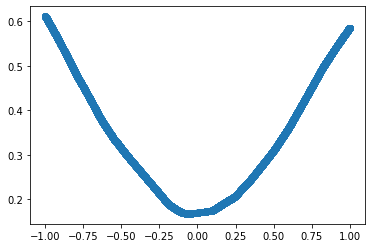

In [0]:
plt.scatter(Input.numpy(), Predicted.detach().numpy())

## **Mini-Batch**

As the model and the data grows bigger, we won't be able to do calculations for the whole data in one step. As the matrix grows we will start running out of resources. To deal with this problem we split the training dataset into small batches and use one batch at a time to calculate loss and update model parameters.

Note: When we use batches to calculate loss and update parameters instead of the whole data, it is known as 'mini-batch' gradient descent. If the batch has only 1 data element, it becomes stochastic gradient descent.

Let's implement it in our model.

In [0]:
# Define Model
class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.Layer1 = torch.nn.Sequential(torch.nn.Linear(1, 100, bias=True), torch.nn.ReLU(), torch.nn.Linear(100, 1, bias=True))

  def forward(self, Input):
    Prediction = self.Layer1(Input)
    return Prediction

# Instantiate Model
Model = Net()

# Loss Function
Loss_Function = torch.nn.MSELoss()

learning_rate = 0.001
# Divide the data into small batches where every batch will have atmost 1000 elements
batch_size = 1000
epoch = 1000
sample_size = 10000

# Optimizer
Optimizer = torch.optim.SGD(Model.parameters(), lr=learning_rate)

for epoch in range(epoch):
  i = 0
  # Second loop for going through each batch every epoch
  for batch in range(sample_size//batch_size):

    # Create a batch of Inputs and Targets
    X = Input[i:i+batch_size]
    Y = Target[i:i+batch_size]
    i+=batch_size

    # Forward Pass 
    Predicted = Model(X)

    # Compute Loss
    Loss = Loss_Function(Y, Predicted)

    # Backward Pass
    Loss.backward()
    Optimizer.step()
    Optimizer.zero_grad()

  # Print Loss
  if epoch%100 == 0:
    print('MSE for epoch {} is {}'.format(epoch, Loss))

print('MSE for epoch {} is {}'.format(epoch, Loss))

MSE for epoch 0 is 0.3917778730392456
MSE for epoch 100 is 0.047100380063056946
MSE for epoch 200 is 0.027526233345270157
MSE for epoch 300 is 0.01595677062869072
MSE for epoch 400 is 0.009315085597336292
MSE for epoch 500 is 0.005606395658105612
MSE for epoch 600 is 0.0035743031185120344
MSE for epoch 700 is 0.0024663754738867283
MSE for epoch 800 is 0.0018539407756179571
MSE for epoch 900 is 0.0015028283232823014
MSE for epoch 999 is 0.0012905359035357833


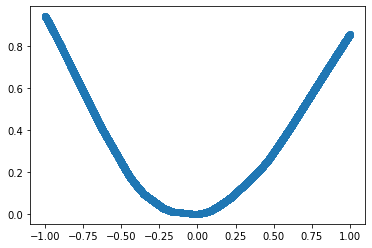

In [0]:
Predicted = Model(Input)
plt.scatter(Input.numpy(), Predicted.detach().numpy())

### **Dataset Class**

PyTorch provides an abstract Dataset class through which we can access both the independent and dependent variables simultaneously.

In [0]:
# Both Input and Target can be combined into a Dataset Object
from torch.utils.data import TensorDataset
Train = TensorDataset(Input, Target)

In [0]:
# Define Model
class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.Layer1 = torch.nn.Sequential(torch.nn.Linear(1, 100, bias=True), torch.nn.ReLU(), torch.nn.Linear(100, 1, bias=True))

  def forward(self, Input):
    Prediction = self.Layer1(Input)
    return Prediction

# Instantiate Model
Model = Net()

# Loss Function
Loss_Function = torch.nn.MSELoss()

learning_rate = 0.001
# Divide the data into small batches where every batch will have atmost 1000 elements
batch_size = 1000
epoch = 1000
sample_size = 10000

# Optimizer
Optimizer = torch.optim.SGD(Model.parameters(), lr=learning_rate)

for epoch in range(epoch):
  i = 0
  for batch in range(sample_size//batch_size):
    # Create batch for Input and Target simultaneously
    X, Y = Train[i:i+batch_size]
    i+=batch_size

    # Forward Pass 
    Predicted = Model(X)

    # Compute Loss
    Loss = Loss_Function(Y, Predicted)

    # Backward Pass
    Loss.backward()
    Optimizer.step()
    Optimizer.zero_grad()

  # Print Loss
  if epoch%100 == 0:
    print('MSE for epoch {} is {}'.format(epoch, Loss))

print('MSE for epoch {} is {}'.format(epoch, Loss))

MSE for epoch 0 is 0.10118892788887024
MSE for epoch 100 is 0.021638544276356697
MSE for epoch 200 is 0.008815986104309559
MSE for epoch 300 is 0.0038014284800738096
MSE for epoch 400 is 0.0018760001985356212
MSE for epoch 500 is 0.00113735964987427
MSE for epoch 600 is 0.0008451624307781458
MSE for epoch 700 is 0.0007190657779574394
MSE for epoch 800 is 0.0006547732627950609
MSE for epoch 900 is 0.0006139452452771366
MSE for epoch 999 is 0.000582836742978543


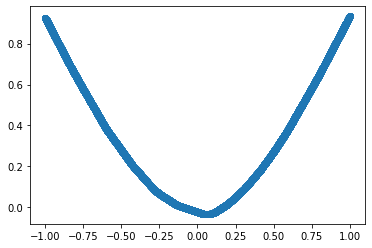

In [0]:
Predicted = Model(Input)
plt.scatter(Input.numpy(), Predicted.detach().numpy())

### **DataLoader**

Pytorch’s DataLoader is created using Dataset. DataLoader automatically manages batches and makes it easier to iterate creating mini-batches automatically.

In [0]:
from torch.utils.data import DataLoader
batch_size = 1000
Train_Data = DataLoader(Train, batch_size=batch_size)

In [0]:
# Define Model
class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.Layer1 = torch.nn.Sequential(torch.nn.Linear(1, 100, bias=True), torch.nn.ReLU(), torch.nn.Linear(100, 1, bias=True))

  def forward(self, Input):
    Prediction = self.Layer1(Input)
    return Prediction

# Instantiate Model
Model = Net()

# Loss Function
Loss_Function = torch.nn.MSELoss()

learning_rate = 0.001
epoch = 1000
sample_size = 10000

# Optimizer
Optimizer = torch.optim.SGD(Model.parameters(), lr=learning_rate)

for epoch in range(epoch):
  # Generate minibatches automatically
  for X, Y in Train_Data:

    # Forward Pass 
    Predicted = Model(X)

    # Compute Loss
    Loss = Loss_Function(Y, Predicted)

    # Backward Pass
    Loss.backward()
    Optimizer.step()
    Optimizer.zero_grad()

  # Print Loss
  if epoch%100 == 0:
    print('MSE for epoch {} is {}'.format(epoch, Loss))

print('MSE for epoch {} is {}'.format(epoch, Loss))

MSE for epoch 0 is 0.10962165892124176
MSE for epoch 100 is 0.026488548144698143
MSE for epoch 200 is 0.010075720958411694
MSE for epoch 300 is 0.004697981756180525
MSE for epoch 400 is 0.002938089892268181
MSE for epoch 500 is 0.0023369460832327604
MSE for epoch 600 is 0.002102144295349717
MSE for epoch 700 is 0.001983444672077894
MSE for epoch 800 is 0.0019027324160560966
MSE for epoch 900 is 0.0018357851076871157
MSE for epoch 999 is 0.0017756690504029393


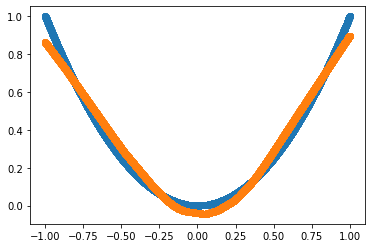

In [0]:
Predicted = Model(Input)
plt.scatter(Input.numpy(), Target.numpy())
plt.scatter(Input.numpy(), Predicted.detach().numpy())

## **Adding validation dataset to our pipeline**

In practice we usually evaluate the model performance on validation data to see. Let's see how can we add validation data for neural networks.

In [0]:
# Generating validation data using the same method used for generating train data
# Since we are randomly generating numbers, it will rarely have any common elements with train data
Validation_Input = 2*torch.rand(4000, 1)-1
Validation_Target = Validation_Input.pow(2)

# We usually use a bigger batch size for validation
# Validation set does not need backpropagation and takes less memory
Validation = TensorDataset(Validation_Input, Validation_Target)
Validation_Data = DataLoader(Validation, batch_size=batch_size*2)

In [0]:
# Define Model
class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.Layer1 = torch.nn.Sequential(torch.nn.Linear(1, 100, bias=True), torch.nn.ReLU(), torch.nn.Linear(100, 1, bias=True))

  def forward(self, Input):
    Prediction = self.Layer1(Input)
    return Prediction

# Instantiate Model
Model = Net()

# Loss Function
Loss_Function = torch.nn.MSELoss()

learning_rate = 0.001
epoch = 1000
sample_size = 10000

# Optimizer
Optimizer = torch.optim.SGD(Model.parameters(), lr=learning_rate)

for epoch in range(epoch):
  # Always use model.train() before training
  # Advanced features like Dropout are affected by it
  Model.train()

  # Generate minibatches automatically
  for X, Y in Train_Data:

    # Forward Pass 
    Predicted = Model(X)

    # Compute Loss
    Loss = Loss_Function(Y, Predicted)

    # Backward Pass
    Loss.backward()
    Optimizer.step()
    Optimizer.zero_grad()

  # Calculate Validation Loss
  if epoch%100 == 0:
    # Always use model.eval() before inference
    Model.eval()
    with torch.no_grad():
      # Add the loss of all the batches
      Validation_Loss = sum(Loss_Function(Y, Model(X)) for X, Y in Validation_Data)
      # Divide by number of batches
      Validation_Loss = Validation_Loss/len(Validation_Data)
    
    print('Epoch: {}. Train MSE: {}. Validation MSE: {}'.format(epoch, Loss, Validation_Loss))

# Calulate Validation Loss
Model.eval()
with torch.no_grad():
  Validation_Loss = sum(Loss_Function(Y, Model(X)) for X, Y in Validation_Data)
  Validation_Loss = Validation_Loss/len(Validation_Data)

print('Epoch: {}. Train MSE: {}. Validation MSE: {}'.format(epoch, Loss, Validation_Loss))

Epoch: 0. Train MSE: 0.13967250287532806. Validation MSE: 0.14241859316825867
Epoch: 100. Train MSE: 0.041266076266765594. Validation MSE: 0.0435674786567688
Epoch: 200. Train MSE: 0.01690182462334633. Validation MSE: 0.017931733280420303
Epoch: 300. Train MSE: 0.006995978765189648. Validation MSE: 0.00747634656727314
Epoch: 400. Train MSE: 0.0030869573820382357. Validation MSE: 0.003329621162265539
Epoch: 500. Train MSE: 0.0015749171143397689. Validation MSE: 0.0017123932484537363
Epoch: 600. Train MSE: 0.0009913836838677526. Validation MSE: 0.0010800831951200962
Epoch: 700. Train MSE: 0.0007597575895488262. Validation MSE: 0.0008243080810643733
Epoch: 800. Train MSE: 0.0006598331383429468. Validation MSE: 0.0007114642066881061
Epoch: 900. Train MSE: 0.0006090560927987099. Validation MSE: 0.0006531901890411973
Epoch: 999. Train MSE: 0.0005771310534328222. Validation MSE: 0.0006165735539980233


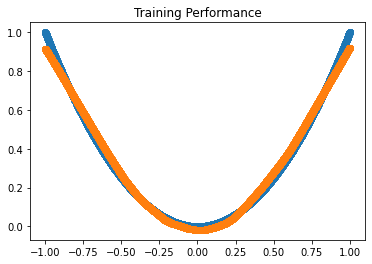

In [0]:
# Plot Train Predictions
Model.eval()
Predicted = Model(Input)
plt.title('Training Performance')
plt.scatter(Input.numpy(), Target.numpy())
plt.scatter(Input.numpy(), Predicted.detach().numpy())

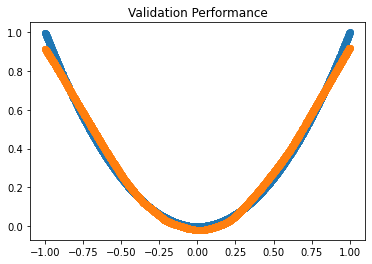

In [0]:
# Plot Validation Predictions
Model.eval()
Validation_Predicted = Model(Validation_Input)
plt.title('Validation Performance')
plt.scatter(Validation_Input.numpy(), Validation_Target.numpy())
plt.scatter(Validation_Input.numpy(), Validation_Predicted.detach().numpy())

Our simple neural network is approximating the non-linear relationship between *Input* and *Target* quite well. Using validation data, we can also confirm that our model is generalizing well and not overfitting.

We can use this approach to create complicated Neural Networks for large dimensional data very easily.

## **Classification using Neural Networks**

Till now we have only looked at regression problem. Let's create a neural network with 2 Hidden Layers for a classification problem.

Let's start by generating training and validation data.

In [0]:
Input = 2*torch.rand(15000, 2, dtype=torch.float)-1
Target = torch.zeros(15000, dtype=torch.long)
Target[Input[:,0].pow(2) + Input[:,1].pow(2) >= 1] = 1
Target[Input[:,0].pow(2) + Input[:,1].pow(2) < 0.25] = 2

We want our neural network to correctly identify in which region a coordinates will lie in.

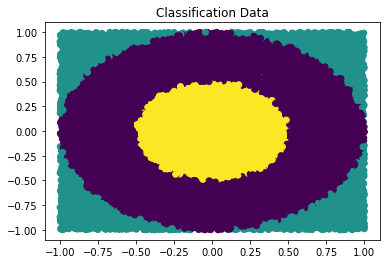

In [0]:
plt.title('Classification Data')
plt.scatter(Input[:, 0].numpy(), Input[:, 1].numpy(), c=Target.numpy())

In [0]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

Train_Dataset = TensorDataset(Input[:10000], Target[:10000])
Validation_Dataset = TensorDataset(Input[10000:], Target[10000:])

batch_size = 1000
Train_DataLoader = DataLoader(Train_Dataset, batch_size=batch_size, shuffle=True)
Validation_DataLoader = DataLoader(Validation_Dataset, batch_size=batch_size*2)

The objective is to create a Neural Network that can identify the region of the coordinates.

We can create a neural network in the same way using ***torch.nn.Module***. We will use gradient descent, exactly in the same way as implemented for regression, to update our weights.

The only change is we will be use a different loss function as *MSE* can't be used for classification problems.

In [0]:
# Define Model with 2 Hidden Layers
# Each Hidden Layer has 100 Hidden Units with ReLU Activations
class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.Layer1 = torch.nn.Sequential(torch.nn.Linear(2, 100), torch.nn.ReLU())
    self.Layer2 = torch.nn.Sequential(torch.nn.Linear(100, 100), torch.nn.ReLU())
    self.Layer3 = torch.nn.Linear(100, 3)

  def forward(self, X):
    X = self.Layer1(X)
    X = self.Layer2(X)
    X = self.Layer3(X)
    return X

# Instantiate Model
Model = Net()

# Loss Function - Cross Entropy Loss
# It is the most commonly used loss function for Classification
# It combines negative log likelihood loss and log softmax activation
Loss_Function = torch.nn.CrossEntropyLoss()

learning_rate = 0.01
epoch = 1000
sample_size = 10000

# Optimizer - Stochastic Gradient Descent
Optimizer = torch.optim.SGD(Model.parameters(), lr=learning_rate)

for epoch in range(epoch):
  Model.train()
  for X, Y in Train_DataLoader:

    # Forward Pass 
    Predicted = Model(X)

    # Compute Loss
    Loss = Loss_Function(Predicted, Y)

    # Backward Pass
    Loss.backward()
    Optimizer.step()
    Optimizer.zero_grad()

  # Calculate Validation Loss
  if epoch%100 == 0:
    Model.eval()
    with torch.no_grad():
      Validation_Loss = sum(Loss_Function(Model(X), Y) for X, Y in Validation_DataLoader)
      Validation_Loss = Validation_Loss/len(Validation_Data)
    print('Epoch: {}. Train Loss: {}. Validation Loss: {}'.format(epoch, Loss, Validation_Loss))

# Calulate Validation Loss
Model.eval()
with torch.no_grad():
  Validation_Loss = sum(Loss_Function(Model(X), Y) for X, Y in Validation_DataLoader)
  Validation_Loss = Validation_Loss/len(Validation_DataLoader)

print('Epoch: {}. Train Loss: {}. Validation Loss: {}'.format(epoch, Loss, Validation_Loss))

Epoch: 0. Train Loss: 1.0692033767700195. Validation Loss: 1.6002000570297241
Epoch: 100. Train Loss: 0.7870098948478699. Validation Loss: 1.2232086658477783
Epoch: 200. Train Loss: 0.5144855380058289. Validation Loss: 0.7721951007843018
Epoch: 300. Train Loss: 0.3202561140060425. Validation Loss: 0.47720080614089966
Epoch: 400. Train Loss: 0.22362343966960907. Validation Loss: 0.3464054465293884
Epoch: 500. Train Loss: 0.18477129936218262. Validation Loss: 0.2803383469581604
Epoch: 600. Train Loss: 0.15685611963272095. Validation Loss: 0.24029332399368286
Epoch: 700. Train Loss: 0.14225637912750244. Validation Loss: 0.21260468661785126
Epoch: 800. Train Loss: 0.13021738827228546. Validation Loss: 0.19212421774864197
Epoch: 900. Train Loss: 0.10743986815214157. Validation Loss: 0.17630931735038757
Epoch: 999. Train Loss: 0.1008223295211792. Validation Loss: 0.10922089964151382


In [0]:
Model.eval()
Predicted = Model(Input)
print('Training Accuracy:', (Predicted[:10000].argmax(1) == Target[:10000]).float().mean().item())
print('Validation Accuracy', (Predicted[10000:].argmax(1) == Target[10000:]).float().mean().item())

Training Accuracy: 0.9822999835014343
Validation Accuracy 0.9818000197410583


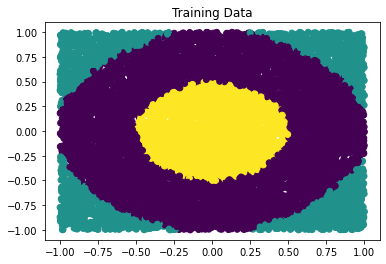

In [0]:
plt.title('Training Data')
plt.scatter(Input[:10000, 0].numpy(), Input[:10000, 1].numpy(), c=Predicted.argmax(1).numpy()[:10000])

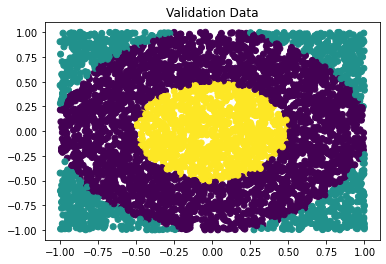

In [0]:
plt.title('Validation Data')
plt.scatter(Input[10000:, 0].numpy(), Input[10000:, 1].numpy(), c=Predicted.argmax(1).numpy()[10000:])

The predictions are visibly near identical to the actual target. We also observe that the accuracy is greater than 98% for both Train and *Validation*. It shows how powerful neural networks can be.

# Summary

We now should have a good understanding of how neural network basics, how they work, what are model parameters and why activations functions are important. 

On the practical front, we can now create a neural network from scratch using Pytorch, calculate loss, implement gradient descent to update weights, measure performance on a seperate validation dataset and use pre-built Pytorch functionalities like torch.nn, torch.optim or DataLoaders.

Using the approach shown in this tutorial, you can now harness the power of neural networks to solve many real-world problems. I hope this will encourage you to dive deeper into the world of deep learning.



